Found 16 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step
Test Accuracy: 87.50%


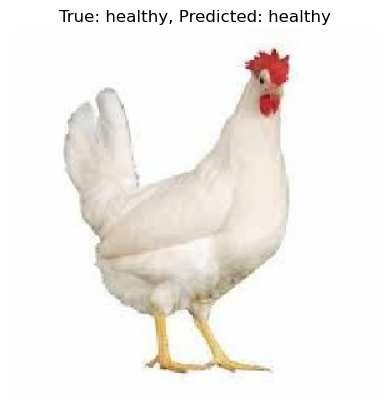

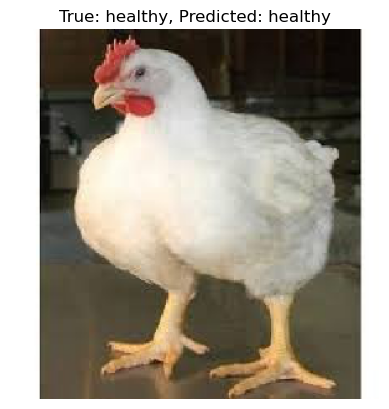

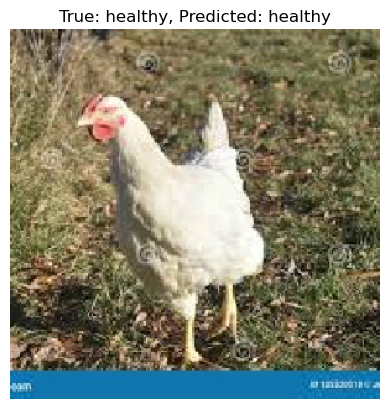

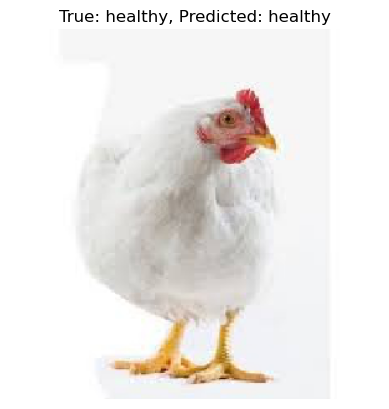

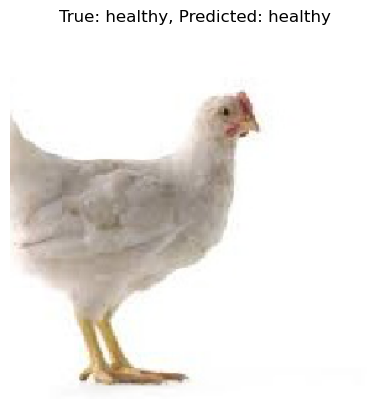

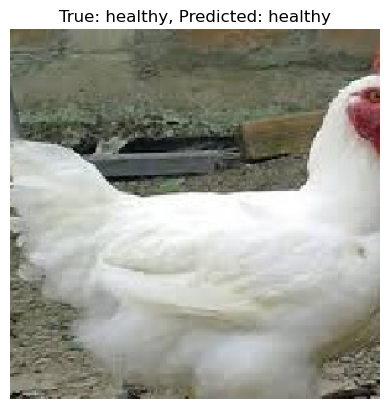

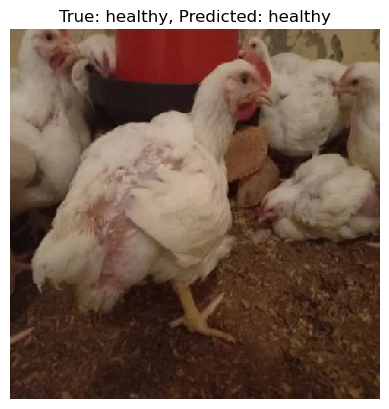

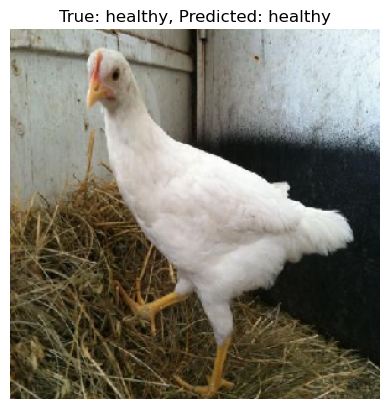

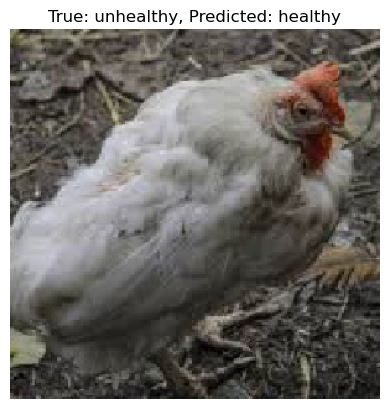

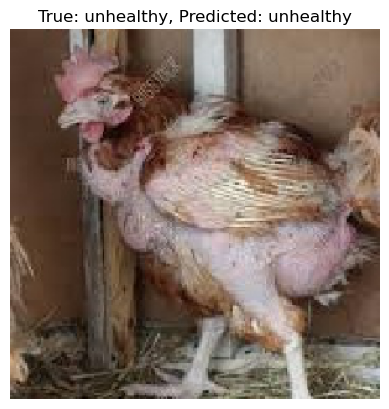

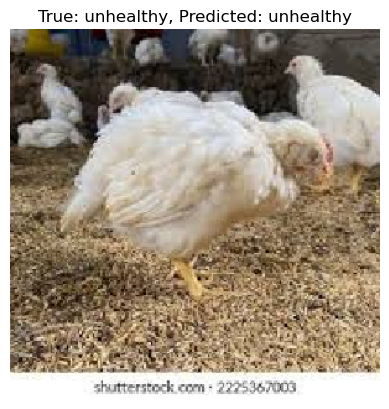

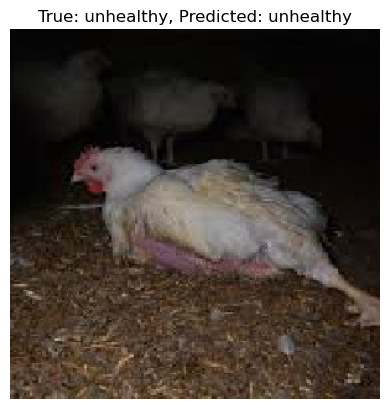

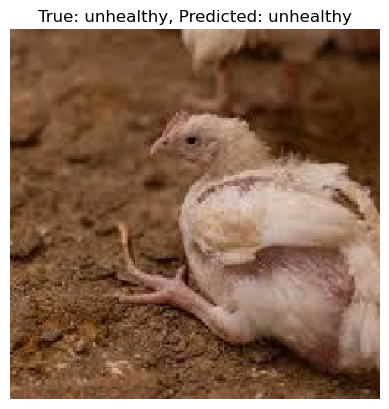

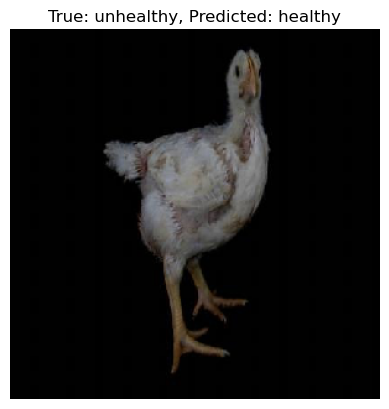

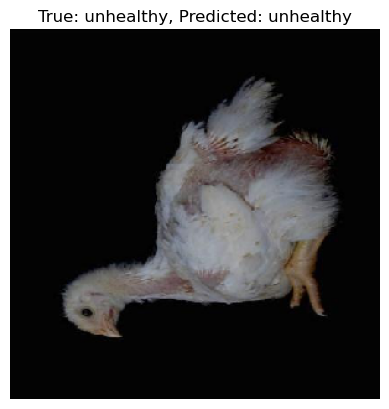

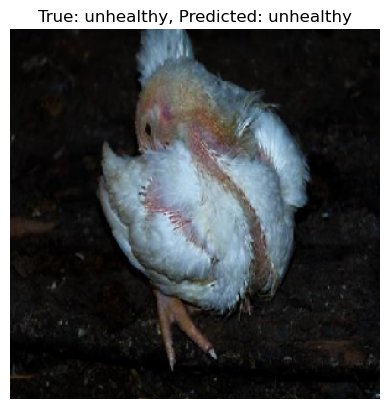

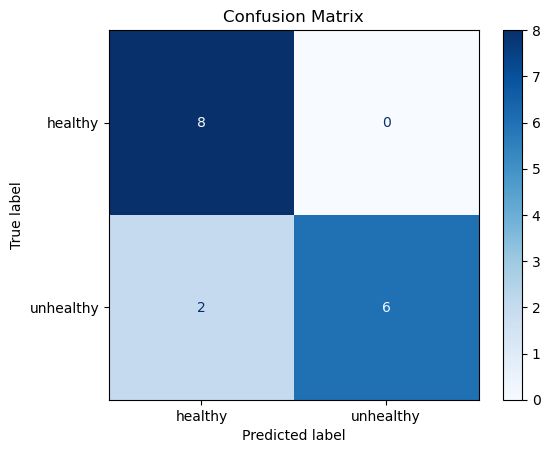

In [9]:
#folder directory
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

model = load_model(r"C:/Users/sanja/OneDrive/Desktop/poultry/path_to_save_model/my_model_inceptionv3.h5")

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_gen = test_datagen.flow_from_directory(
    r'C:\Users\sanja\OneDrive\Desktop\poultry\testing', 
    target_size=(299, 299),
    batch_size=1,  
    class_mode='binary',
    shuffle=False  
)

test_features = base_model.predict(test_gen)
test_features_flattened = test_features.reshape(test_features.shape[0], -1)
predictions = model.predict(test_features_flattened)
predicted_classes = np.round(predictions).astype(int)  

true_labels = test_gen.classes

accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

class_names = list(test_gen.class_indices.keys()) 

test_gen.reset() 

for i in range(len(predicted_classes)):
    img, _ = test_gen[i] 
    true_label = true_labels[i]
    predicted_label = class_names[int(predicted_classes[i])]

    plt.imshow(img[0])
    plt.title(f"True: {class_names[true_label]}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

cm = confusion_matrix(true_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()



1/1 [==============================] - 2s 2s/step
Detection Result: UnHealthy


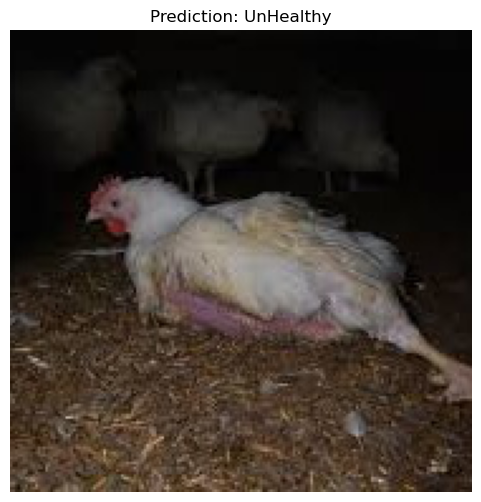

Found 16 images belonging to 2 classes.
1/1 [==============================] - 0s 188ms/step
Test Accuracy: 75.00%


0.75

In [10]:
#single image path
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image as PILImage

model = load_model(r"C:/Users/sanja/OneDrive/Desktop/poultry/path_to_save_model/my_model_inceptionv3.h5")

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

TEST_IMAGE_PATH = r"C:\Users\sanja\OneDrive\Desktop\poultry\images\images\12.jpg"

def detect_disease(image_path):
    img = PILImage.open(image_path)
    img = img.resize((299, 299))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    features = base_model.predict(img_array)
    features_flattened = features.reshape(features.shape[0], -1)
    prediction = model.predict(features_flattened)
    predicted_class = np.round(prediction).astype(int)[0][0]
    class_names = ['Healthy', 'UnHealthy']
    result = class_names[predicted_class]

    print(f"Detection Result: {result}")

    plt.figure(figsize=(6, 6))
    plt.imshow(PILImage.open(image_path))
    plt.title(f"Prediction: {result}")
    plt.axis('off')  
    plt.show()

def evaluate_model():
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_gen = test_datagen.flow_from_directory(
        r'C:\Users\sanja\OneDrive\Desktop\poultry\testing',
        target_size=(299, 299),
        batch_size=1,
        class_mode='binary',
        shuffle=False
    )

    test_features = base_model.predict(test_gen)
    test_features_flattened = test_features.reshape(test_features.shape[0], -1)
    predictions = model.predict(test_features_flattened)
    predicted_classes = np.round(predictions).astype(int)

    true_labels = test_gen.classes
    accuracy = accuracy_score(true_labels, predicted_classes)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return accuracy

detect_disease(TEST_IMAGE_PATH)
evaluate_model()
